# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and make changes there. __DO NOT__ request access to this tutorial.


# Install detectron2

In [ ]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
! pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 274 kB 9.6 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=6b6a086d1d2c70447a079704969001617637a6bfb6ecf29fae77328b13d68c44
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
torch:  1.10 ; cuda:  cu111
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
     |████████████████████████████████| 7.0 MB 5.8 MB/s 
     |████████████████████████████████| 130 kB 8.0 MB/s 
     |████████████████████████████████| 145 kB 61.1 MB/s 
     |████████████████████████████████| 50 kB 8.1 MB/s 
     |████████████████████████████████| 74 kB 3.4 MB/s 
     |████████████████████████████████| 749 kB 66.7 MB/s 
     |████████████████████████████████

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

import torch
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
# from PIL import ImageOp

from detectron2.modeling.poolers import ROIAlign, ROIPooler
import pickle

import matplotlib.pyplot as plt
import pathlib

[Digging into Detectron 2](https://medium.com/@hirotoschwert/digging-into-detectron-2-part-5-6e220d762f9)

# Test

## Run a pre-trained detectron2 model

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if yo're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_f97cb7.pkl: 136MB [00:01, 84.6MB/s]                           


In [ ]:
resnetFeatures = []
def hook(module, input, output): 
    resnetFeatures.append(output)

handle = predictor.model.backbone.register_forward_hook(hook)


## Predict

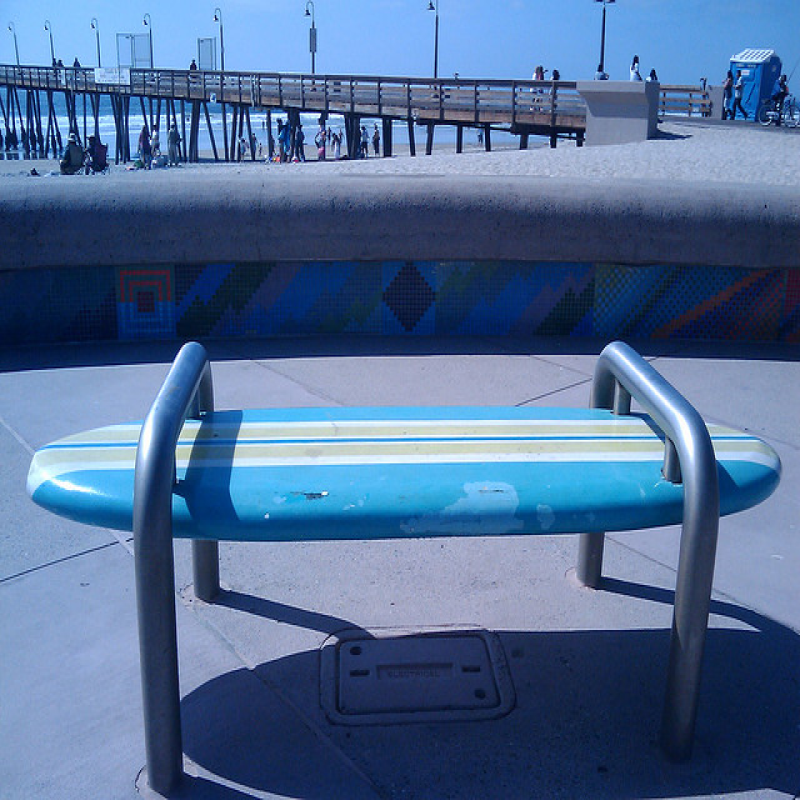

In [ ]:
image_url = 'http://images.cocodataset.org/train2017/000000032664.jpg'
# ! wget http://images.cocodataset.org/train2017/000000000074.jpg -q -O input2.jpg
! wget $image_url -q -O input2.jpg
im2 = cv2.imread("./input2.jpg")
im2 = cv2.resize(im2, (800, 800), interpolation=cv2.INTER_AREA)
cv2_imshow(im2)

In [ ]:
# outputs = predictor(im)
outputs = predictor(im2)
print(outputs)

{'instances': Instances(num_instances=20, image_height=800, image_width=800, fields=[pred_boxes: Boxes(tensor([[ 18.9045, 326.2421, 786.2303, 774.8705],
        [ 62.1390, 136.7995,  83.9589, 174.8729],
        [137.8422, 125.8962, 153.5690, 169.0122],
        [721.9236,  70.8267, 740.3043, 121.5175],
        [166.5358, 125.1134, 180.8548, 165.6213],
        [ 87.7870, 135.2775, 103.7187, 173.2428],
        [292.8482, 121.3897, 307.5125, 162.4722],
        [315.8673, 123.3112, 333.6870, 160.7782],
        [153.1602, 126.8696, 167.2946, 167.1723],
        [370.1662, 127.2526, 382.8889, 156.7650],
        [360.4575, 125.8575, 373.2433, 157.9117],
        [629.5976,  55.5634, 640.2419,  79.5149],
        [773.6889,  72.2321, 792.7315, 126.0544],
        [646.1522,  65.3345, 660.9417, 129.1562],
        [548.6890,  67.0029, 559.4313,  83.0243],
        [765.6373,  75.3650, 786.4670, 123.0581],
        [323.4688, 123.5901, 342.5786, 160.0563],
        [273.2621, 117.4646, 286.3775, 159.3955

In [ ]:
print(resnetFeatures[0]['res4'].shape)
boxes = outputs['instances'].get('pred_boxes').tensor
print(boxes)
print(boxes.shape)

index = torch.Tensor( [ [i] for i in range(len(boxes))] ).cuda()
print(index)
print(index.shape)

boxes = torch.cat((index, boxes), 1)
print(boxes)
print(boxes.shape)

torch.Size([1, 1024, 50, 50])
tensor([[ 18.9045, 326.2421, 786.2303, 774.8705],
        [ 62.1390, 136.7995,  83.9589, 174.8729],
        [137.8422, 125.8962, 153.5690, 169.0122],
        [721.9236,  70.8267, 740.3043, 121.5175],
        [166.5358, 125.1134, 180.8548, 165.6213],
        [ 87.7870, 135.2775, 103.7187, 173.2428],
        [292.8482, 121.3897, 307.5125, 162.4722],
        [315.8673, 123.3112, 333.6870, 160.7782],
        [153.1602, 126.8696, 167.2946, 167.1723],
        [370.1662, 127.2526, 382.8889, 156.7650],
        [360.4575, 125.8575, 373.2433, 157.9117],
        [629.5976,  55.5634, 640.2419,  79.5149],
        [773.6889,  72.2321, 792.7315, 126.0544],
        [646.1522,  65.3345, 660.9417, 129.1562],
        [548.6890,  67.0029, 559.4313,  83.0243],
        [765.6373,  75.3650, 786.4670, 123.0581],
        [323.4688, 123.5901, 342.5786, 160.0563],
        [273.2621, 117.4646, 286.3775, 159.3955],
        [278.2902, 117.7367, 295.3087, 163.1953],
        [533.3895,  

## Draw Boxes

In [ ]:
coco_classes = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}


In [ ]:
def draw(image, max_boxes, min_score, boxes, class_names, scores):
  '''
  -- params -- 
  max boxes : maximum no of bounding boxes you want to show in the image
  min_score: threshold value for your desired detection score
  '''
  # get color values from PIL.Image.Color 
  colors = list(ImageColor.colormap.values())

  # get font name from PIL.ImageFont
  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                            25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  detected_boxes = boxes.shape[0] 

  for i in range(min(max_boxes, detected_boxes)):
    if scores[i] >= min_score: # if detection score >= your desired score

      # ymin, xmin, ymax, xmax = tuple(boxes[i]) # bbox coordinate values
      xmin, ymin, xmax, ymax = tuple(boxes[i]) # bbox coordinate values
      
      # decode detected object name with score, example, b'Umbrella' --> Umbrella: 92%
      # display_str = "{}: {}%".format(class_names[i].decode("ascii"), 
      #                                int(100 * scores[i]))

      # print(class_names[0])
      display_str =  "{}: {}%".format(coco_classes[class_names[i]], 
                                     int(100 * scores[i]))
      
      # set bbox color same to every same class
      color = colors[hash(class_names[i]) % len(colors)]

      # Convert Image to numpy type and RGB
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")

      draw_bbox_text_on_image(
          image_pil,
          ymin, xmin,
          ymax, xmax,
          color, font,
          display_str_list=[display_str]
      )
      np.copyto(image, np.array(image_pil))

  return image   

def draw_bbox_text_on_image(image,
                            ymin, xmin,
                            ymax, xmax,
                            color, font, thickness=4,
                            display_str_list=()):
  
    """ Calculates bbox coordinates, text coordinates and draw """
    # creates PIL Draw Object  
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size

    # Formula for bbox coordinate calculation 
    (left, right, top, bottom) = (xmin, xmax, ymin, ymax)
    # Draw bbox with coordinates 
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
              (left, top)],
              width=thickness,
              fill=color)

    # get font size from String list
    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list] # 11

    # Each display_str has a top and bottom margin of 0.05x.
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights) # 12
    

    # calculation for showing better class label position with bbox 
    if top > total_display_str_height:
      text_bottom = top
    else:
      text_bottom = top + total_display_str_height
      
    for display_str in display_str_list:
      text_width, text_height = font.getsize(display_str)
      margin = np.ceil(0.05 * text_height)
      
      # draw rectangle with color 
      draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                      (left + text_width, text_bottom)],
                    fill=color)
      
      # put text in drawn colored rectangle 
      draw.text((left + margin, text_bottom - text_height - margin),
                display_str,
                fill="black",
                font=font)

In [ ]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.axis('off')
  plt.imshow(image)

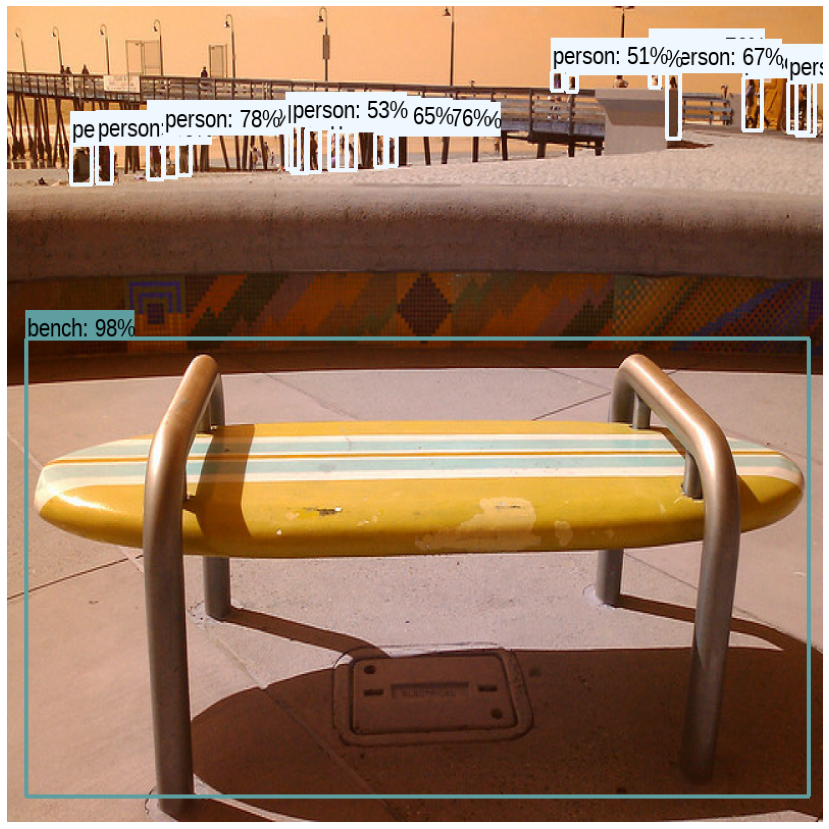

In [ ]:
image_with_boxes = draw(
     image = im2, 
     max_boxes = 20, 
     min_score = 0.5, 
     boxes = outputs['instances'].get('pred_boxes').tensor.cpu().numpy(), 
     class_names = outputs['instances'].get('pred_classes').tolist(),
     scores = outputs['instances'].get('scores').tolist(),
)

display_image(image_with_boxes)